## Import all packages

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from datetime import date
import math
import random
import swifter

## Import data sets

In [171]:
#read in the data

chi_data = pd.read_csv("chicago_2017.csv")
chi_weather = pd.read_csv("weather_hourly_chicago.csv")

## General information about the raw data

### chicago_2017 data set

In [5]:
#chi_data.info()

In [6]:
#chi_data.describe()

In [ ]:
#chi_data.head()

### weather_hourly_chicago data set

In [8]:
#chi_weather.info()

In [ ]:
#chi_weather.describe()

In [ ]:
#chi_data.head()

# Data collection and preparation

## Add date time features to chi_data

In [172]:
chi_data['start_time']= pd.to_datetime(chi_data['start_time'])

In [173]:
chi_data['end_time'] = pd.to_datetime(chi_data['end_time'])

In [174]:
chi_data.sort_values(['start_time'], inplace = True) #Sorts the values by date 

In [175]:
chi_data["Date"] = chi_data['start_time'].swifter.apply(lambda dt: dt.date())

In [176]:
chi_data["Month"] = chi_data['start_time'].swifter.apply(lambda dt: dt.month)

In [177]:
chi_data["Week"] = chi_data['start_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

In [179]:
chi_data["Hour"] = chi_data['start_time'].swifter.apply(lambda dt: dt.hour)

In [180]:
chi_data["Weekday"] = chi_data['start_time'].swifter.apply(lambda dt: dt.weekday())

In [181]:
chi_data['Duration'] = (chi_data['end_time']-chi_data['start_time'])

In [182]:
chi_data["Duration_sec"] = chi_data["Duration"].swifter.apply(lambda x: x.total_seconds())

In [185]:
chi_data["IsWeekday"] = chi_data["Weekday"].swifter.apply(lambda x: 1 if x < 5 else 0)

In [107]:
#chi_data.head()

## Add date weather features to chi_weather_2017

In [ ]:
chi_weather['date_time']=pd.to_datetime(chi_weather['date_time'])

In [ ]:
first_date = datetime(year=2017, day=1, month=1)
last_date = datetime(year=2017, day=31, month=12)
chi_weather_2017 = chi_weather[(chi_weather['date_time']>=first_date)&(chi_weather["date_time"] <= last_date)]

In [ ]:
chi_weather_2017.sort_values(by = "date_time", inplace = True) #sort the values by date time

In [ ]:
chi_weather_2017["Date"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.date())

In [ ]:
chi_weather_2017['Month']= chi_weather_2017["date_time"].swifter.apply(lambda dt: dt.month)

In [ ]:
chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

In [ ]:
chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)

In [ ]:
chi_weather_2017["Weekday"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.weekday())

In [ ]:
chi_weather_2017["mean_temp"] = (chi_weather_2017['max_temp']+chi_weather_2017['min_temp'])/2

In [ ]:
#chi_weather_2017.head()

# Descriptive analystics

## Fleet size

In [29]:
bikes = len(chi_data['bike_id'].unique())
print("The overall number of bikes is {}".format(bikes))

The overall number of bikes is 6243


## Temporal demand patterns

### Bike rentals

#### Bike rentals per month

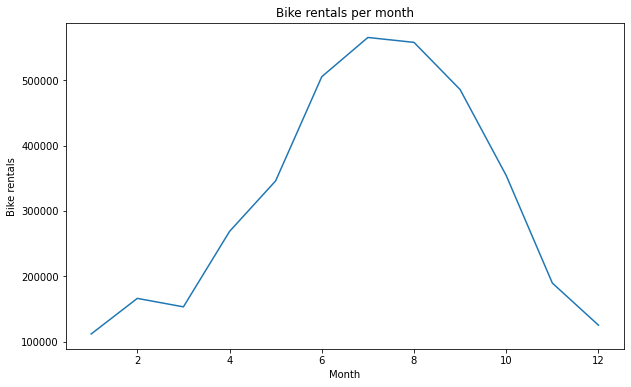

In [203]:
rentals_month = chi_data.groupby(['Month'])['bike_id'].count()
rentals_month = pd.DataFrame(rentals_month)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_month)
ax.set_title('Bike rentals per month')
ax.set_xlabel('Month')
ax.set_ylabel("Bike rentals")
plt.show()

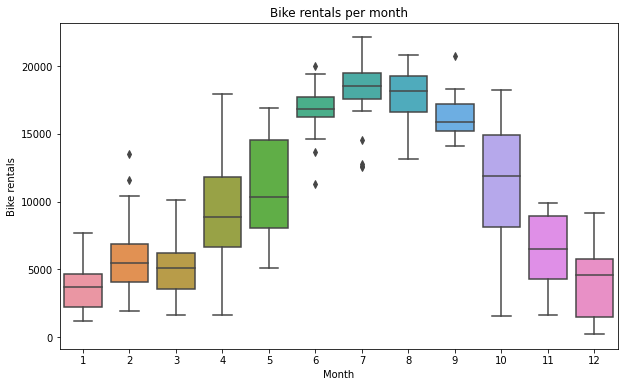

In [204]:
rentals_month_bp = chi_data.groupby(['Date','Month'])['bike_id'].count()
rentals_month_bp = pd.DataFrame(rentals_month_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_month_bp.index.get_level_values('Month'), y =rentals_month_bp['bike_id'], ax = ax)
ax.set_title('Bike rentals per month')
ax.set_ylabel("Bike rentals")
plt.show()

#### Bike rentals per week

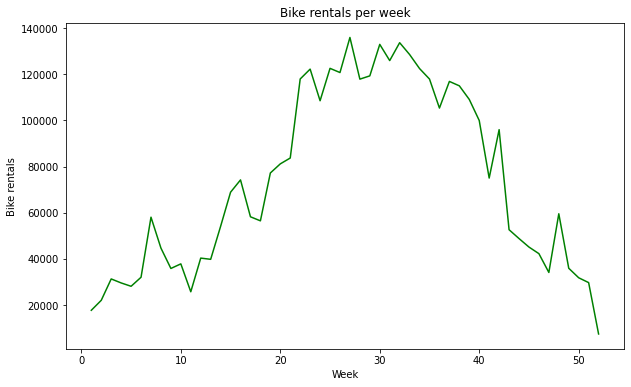

In [205]:
rentals_week = chi_data.groupby("Week")['bike_id'].count()
rentals_week = pd.DataFrame(rentals_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_week, c = "green")

ax.set_title('Bike rentals per week')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Week")
plt.show()

#### Bike rentals per weekday

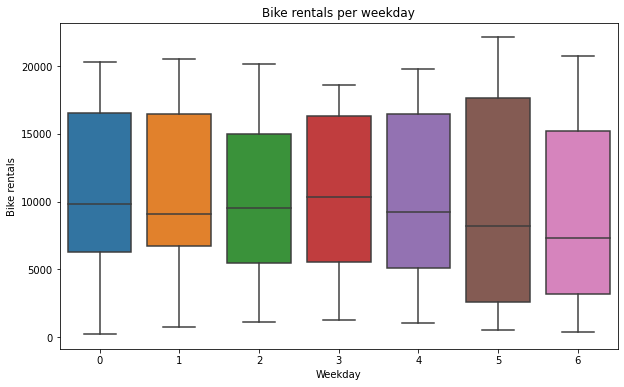

In [206]:
rentals_weekday = chi_data.groupby(['Weekday','Date'])['bike_id'].count()
rentals_weekday = pd.DataFrame(rentals_weekday)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_weekday.index.get_level_values('Weekday'), y =rentals_weekday['bike_id'], ax = ax)
ax.set_title('Bike rentals per weekday')
ax.set_ylabel("Bike rentals")

plt.show()

In [47]:
# legende Zahl - Wochentag

#### Bike rentals over year per day 

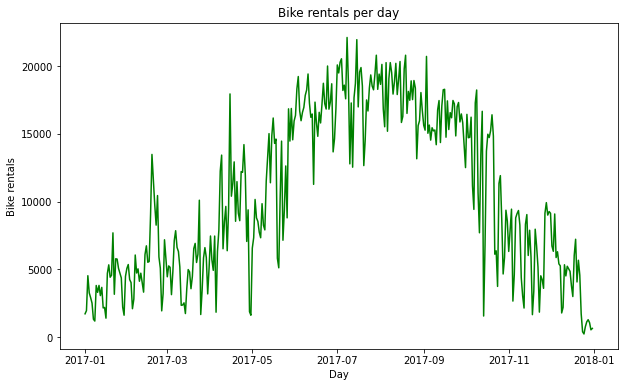

In [207]:
rentals_day = chi_data.groupby("Date")['bike_id'].count()
rentals_day = pd.DataFrame(rentals_day)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_day, c = "green")

ax.set_title('Bike rentals per day')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Day")
plt.show()

#### Bike rentals per hour

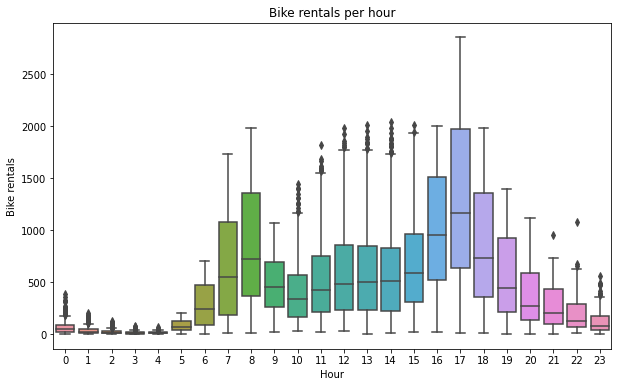

bike_id
Date       Hour         
2017-01-01 0          46
           1          46
           2          36
           3          18
           4           6
...                  ...
2017-12-31 19         20
           20         20
           21         13
           22          9
           23          9

[8743 rows x 1 columns]

In [235]:
rentals_hour = chi_data.groupby(["Date","Hour"])['bike_id'].count()
rentals_hour =pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = rentals_hour.index.get_level_values("Hour"), y =rentals_hour['bike_id'], ax = ax)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
plt.show()
rentals_hour

<function matplotlib.pyplot.show(close=None, block=None)>

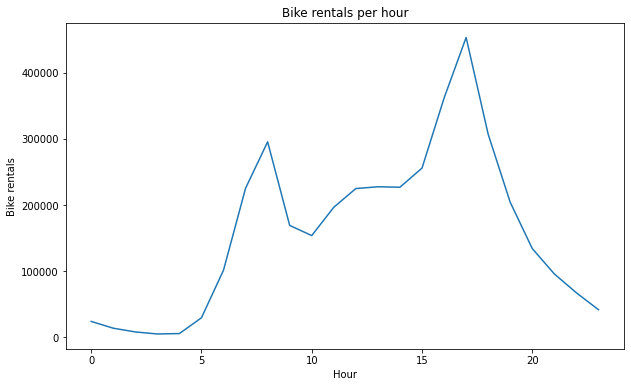

In [228]:
rentals_hour = chi_data.groupby(['Hour'])['bike_id'].count()
rentals_hour = pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_hour)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Hour")
plt.show

#### Correlation between weekday, hour & rentals???

### Duration/Travel time

#### Duration per week

In [ ]:
duration_week = chi_data.groupby("Week")["Duration_sec"].mean()
duration_week = pd.DataFrame(duration_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_week)

ax.set_title('Duration of rentals per week')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Week')
plt.show()

#### Duration per weekday

In [ ]:
duration_weekday = chi_data.groupby("Weekday")["Duration_sec"].mean()
duration_weekday = pd.DataFrame(duration_weekday)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_weekday)

ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Weekday')
plt.show()

In [ ]:
duration_weekday_bp = chi_data.groupby(["Date","Weekday"])['Duration_sec'].mean()
duration_weekday_bp =pd.DataFrame(duration_weekday_bp)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = duration_weekday_bp.index.get_level_values("Weekday"), y =duration_weekday_bp['Duration_sec'], ax = ax)
ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
plt.show()

#### Duration per hour

In [ ]:
duration_hour = chi_data.groupby("Hour")["Duration_sec"].mean()
duration_hour = pd.DataFrame(duration_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_hour)

ax.set_title('Duration of rentals per hour')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Hour')
plt.show()

### Weather

#### Temperature monthly

In [ ]:
temp_month_mean = chi_weather_2017.groupby("Month")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_month_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
ax.set_title("Average temperature per month")

plt.show()

In [ ]:
temp_month_mean_bp = chi_weather_2017.groupby(['Date','Month'])['mean_temp'].mean()
temp_month_mean_bp = pd.DataFrame(temp_month_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = temp_month_mean_bp.index.get_level_values('Month'), y =temp_month_mean_bp['mean_temp'], ax = ax)

ax.set_title('Average temperature per month')
ax.set_ylabel("Temperature")
ax.set_xlabel("Month")
plt.show()

In [ ]:
temp_day_min = chi_weather_2017.groupby("Date")["mean_temp"].min()

temp_day_max = chi_weather_2017.groupby("Date")["mean_temp"].max()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_max, c = "red", label = "Max temperature")
ax.plot(temp_day_min, c = "blue", label = "Min temperature")
plt.legend()
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

#### Temperature weekly

In [ ]:
temp_week_mean = chi_weather_2017.groupby("Week")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_week_mean)
ax.set_ylabel("Temperature")
ax.set_xlabel('Week')
ax.set_title('Average temperature per week')
plt.show()

#### Temperature daily

In [ ]:
temp_day_mean = chi_weather_2017.groupby("Date")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_mean, c = "red")
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

In [ ]:
temp_day_min = chi_weather_2017.groupby("Date")["mean_temp"].min()

temp_day_max = chi_weather_2017.groupby("Date")["mean_temp"].max()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_max, c = "red", label = "Max temperature")
ax.plot(temp_day_min, c = "blue", label = "Min temperature")
plt.legend()
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

#### Precip monthly

In [ ]:
precip_month_mean = chi_weather_2017.groupby("Month")["precip"].mean()

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(precip_month_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Precip percentage')
ax.set_title("Monthly precip percentage")

plt.show()

In [ ]:
precip_month_mean_bp = chi_weather_2017.groupby(['Date','Month'])['precip'].mean()
precip_month_mean_bp = pd.DataFrame(precip_month_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = precip_month_mean_bp.index.get_level_values('Month'), y =precip_month_mean_bp['precip'], ax = ax)

ax.set_xlabel('Month')
ax.set_ylabel('Precip percentage')
ax.set_title("Monthly precip percentage")
plt.show()

#### Precip weekly

In [ ]:
precip_week_mean = chi_weather_2017.groupby("Week")["precip"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(precip_week_mean)
ax.set_title('Weekly precip percentage')
ax.set_ylabel("Precip percentage")
ax.set_xlabel('Week')
plt.show()

#### Precip daily

In [ ]:
precip_day_mean = chi_weather_2017.groupby("Date")["precip"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(precip_day_mean)
ax.set_title('Daily precip percentage')
ax.set_ylabel(" Precip percentage")
ax.set_xlabel('Day')
plt.show()

### Correlation between rentals and weather 

#### Rescaling

In [186]:
rentals_day_resc = (rentals_day-rentals_day.min())/(rentals_day.max()-rentals_day.min())

rentals_week_resc = ((rentals_week-rentals_week.min())/(rentals_week.max()-rentals_week.min()))

rentals_month_resc = ((rentals_month-rentals_month.min())/(rentals_month.max()-rentals_month.min()))

precip_day_resc = (precip_day_mean-precip_day_mean.min())/(precip_day_mean.max()-precip_day_mean.min())

precip_week_resc = (precip_week_mean-precip_week_mean.min())/(precip_week_mean.max()-precip_week_mean.min())

precip_month_resc = (precip_month_mean-precip_month_mean.min())/(precip_month_mean.max()-precip_month_mean.min())

temp_day_resc = (temp_day_mean-temp_day_mean.min())/(temp_day_mean.max()-temp_day_mean.min())

temp_week_resc = (temp_week_mean-temp_week_mean.min())/(temp_week_mean.max()-temp_week_mean.min())

temp_month_resc = ((temp_month_mean-temp_month_mean.min())/(temp_month_mean.max()-temp_month_mean.min()))

#### Rentals and temperatur

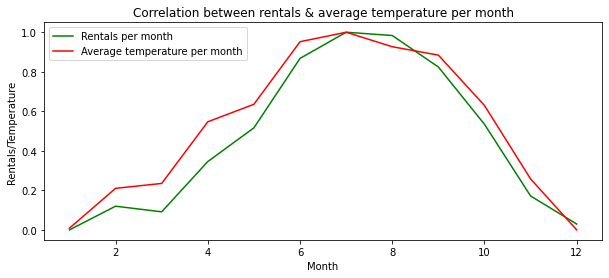

In [187]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_month_resc, c = 'green', label='Rentals per month')
ax.plot(temp_month_resc, c = 'red', label='Average temperature per month')

ax.set_title('Correlation between rentals & average temperature per month')
ax.set_xlabel('Month')
ax.set_ylabel('Rentals/Temperature')
ax.legend()

plt.show()

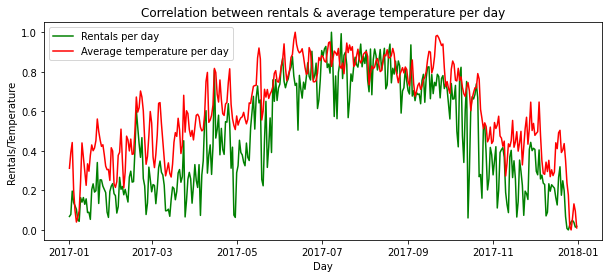

In [188]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_resc, c = 'green', label='Rentals per day')
ax.plot(temp_day_resc, c = 'red', label='Average temperature per day')

ax.set_title('Correlation between rentals & average temperature per day')
ax.set_xlabel('Day')
ax.set_ylabel('Rentals/Temperature')
ax.legend()

plt.show()

In [198]:
#Put weather & rental data into the same data frame
temp_rentals_day = chi_weather_2017.groupby(["Date"])["mean_temp"].mean()
temp_rentals_day = pd.DataFrame(temp_rentals_day)
temp_rentals_day ["Rentals"] = chi_data.groupby(['Date'])['bike_id'].count()
temp_rentals_day ["IsWeekday"] = chi_data.groupby(['Date'])['IsWeekday'].max()

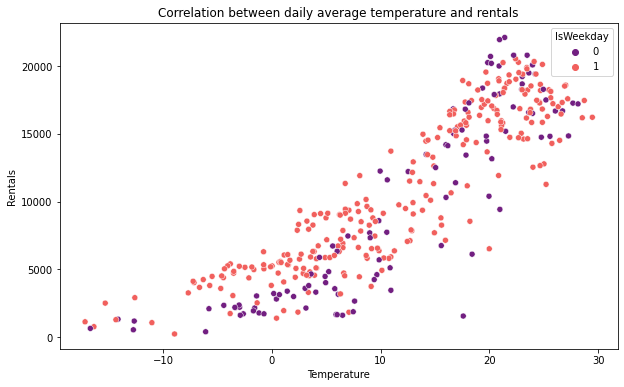

In [199]:

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x = temp_rentals_day["mean_temp"], y= temp_rentals_day["Rentals"], hue = temp_rentals_day["IsWeekday"],palette="magma" )
ax.set_title("Correlation between daily average temperature and rentals")
ax.set_xlabel("Temperature")
plt.show()

In [ ]:
#Put weather & rental data into the same data frame
precip_rentals_day = chi_weather_2017.groupby(["Date"])["precip"].mean()
precip_rentals_day = pd.DataFrame(precip_rentals_day)
precip_rentals_day ["Rentals"] = chi_data.groupby(['Date'])['bike_id'].count()
precip_rentals_day ["IsWeekday"] = chi_data.groupby(['Date'])['IsWeekday'].max()

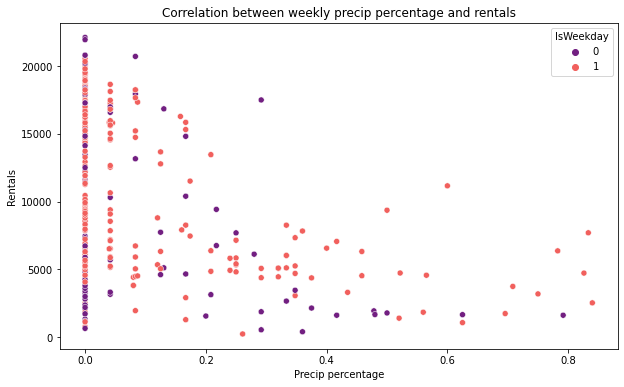

In [191]:

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x = precip_rentals_day["precip"], y= precip_rentals_day["Rentals"], hue = precip_rentals_day["IsWeekday"],palette="magma" )
ax.set_title("Correlation between weekly precip percentage and rentals")
ax.set_xlabel("Precip percentage")
plt.show()

#### Rentals and precip

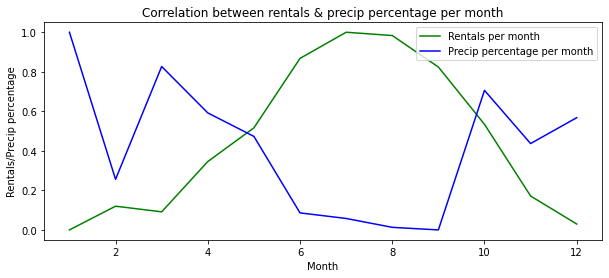

In [193]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_month_resc, c = 'green', label='Rentals per month')
ax.plot(precip_month_resc, c = 'blue', label='Precip percentage per month')

ax.set_title('Correlation between rentals & precip percentage per month')
ax.set_xlabel('Month')
ax.set_ylabel('Rentals/Precip percentage')
ax.legend()

plt.show()

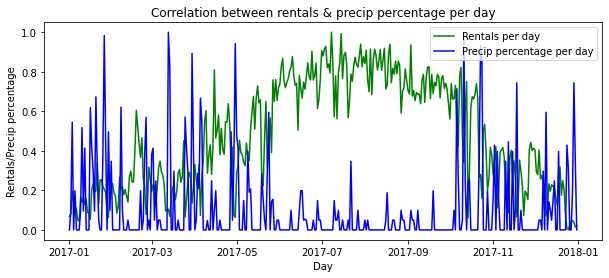

In [194]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_resc, c = 'green', label='Rentals per day')
ax.plot(precip_day_resc, c = 'blue', label='Precip percentage per day')

ax.set_title('Correlation between rentals & precip percentage per day')
ax.set_xlabel('Day')
ax.set_ylabel('Rentals/Precip percentage')
ax.legend()

plt.show()

## Geographical demand patterns